In [1]:
import pandas as pd
import os

# List of all pickle files
pklfiles = [f for f in os.listdir('processed') if os.path.isfile(os.path.join('processed', f)) and f.endswith('.pkl')]
print(pklfiles)

['ad-chega.pkl', 'ad-ps.pkl']


In [2]:
# Load one
video = 'ad-ps'
data = pd.read_pickle(os.path.join('processed', video + '.pkl'))

# Print first lines
data.head() 

,filename,detections,poses,faces,text,embedding,fer
0,img04216.jpeg,"[[337, 29, 684, 660, person, 0.95703125], [106...","[[[0.4757746458053589, 0.3300243020057678, -0....","[[[0.4686388075351715, 0.3715033531188965, -0....","[{2624, NUNEBRQTOS, 32.06, 34.05, MONTHÍSGRO]","[253, 5, 255, 6, 5, 255, 0, 254, 1, 5, 0, 7, 2...","[{'location': [476, 730, 82, 336], 'embedding'..."
1,img04486.jpeg,"[[305, 48, 564, 622, person, 0.93359375], [105...","[[[0.43055295944213867, 0.299244225025177, -0....","[[[0.4321306347846985, 0.32885876297950745, -0...","[{224, NUNEBRQTOS, 33.55, 37.37, MONTHÍSGRO]","[255, 255, 254, 5, 1, 253, 1, 255, 2, 9, 0, 12...","[{'location': [426, 669, 73, 316], 'embedding'..."
2,img02478.jpeg,"[[282, 59, 767, 600, person, 0.84375], [1051, ...","[[[0.6075095534324646, 0.3768922686576843, -0....","[[[0.5977450609207153, 0.41739746928215027, -0...","[824241, NUNEBRQTOS, 19.50, 19.16, MONTYIEGRO]","[1, 254, 0, 4, 255, 1, 0, 0, 14, 10, 253, 4, 3...","[{'location': [669, 908, 126, 365], 'embedding..."
3,img00116.jpeg,"[[445, 42, 597, 610, person, 0.87890625], [108...","[[[0.492895245552063, 0.29679787158966064, -0....","[[[0.48785528540611267, 0.3414287269115448, -0...","[{224, NUNPEBRQTOS, 0O:17, 00.35, MONHHÍEGRO, 9]","[253, 0, 255, 5, 0, 253, 254, 255, 3, 11, 0, 1...","[{'location': [1159, 1229, 520, 591], 'embeddi..."
4,img03917.jpeg,"[[238, 74, 608, 554, person, 0.81640625], [107...","[[[0.3871934711933136, 0.3647031784057617, -0....","[[[0.3794640600681305, 0.41915783286094666, -0...","[1, 5, [2524, NUNPEBRPTOS, 29.45, 31-28, MONTH...","[254, 253, 0, 1, 254, 253, 254, 254, 9, 5, 254...","[{'location': [317, 569, 121, 374], 'embedding..."


In [16]:
data.iloc[0]

filename                                          img04216.jpeg
detections    [[337, 29, 684, 660, person, 0.95703125], [106...
poses         [[[0.4757746458053589, 0.3300243020057678, -0....
faces         [[[0.4686388075351715, 0.3715033531188965, -0....
text              [{2624, NUNEBRQTOS, 32.06, 34.05, MONTHÍSGRO]
embedding     [253, 5, 255, 6, 5, 255, 0, 254, 1, 5, 0, 7, 2...
fer           [{'location': [476, 730, 82, 336], 'embedding'...
Name: 0, dtype: object

Label: person, Number of Frames: 10560
Label: tie, Number of Frames: 132
Label: tv, Number of Frames: 371
Label: chair, Number of Frames: 307
Label: dining table, Number of Frames: 4
Label: bottle, Number of Frames: 2
Label: bowl, Number of Frames: 1
Label: umbrella, Number of Frames: 1


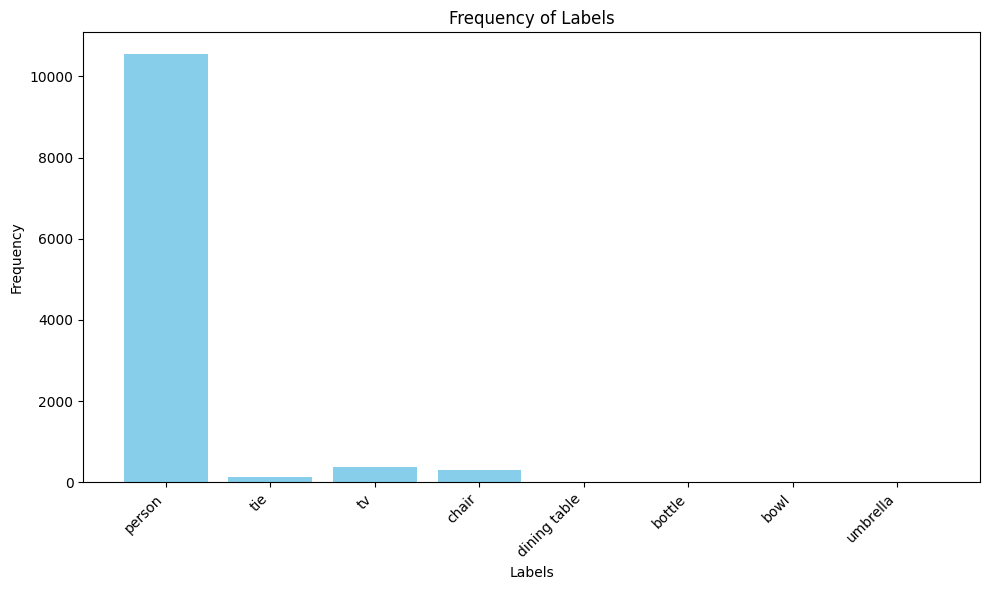

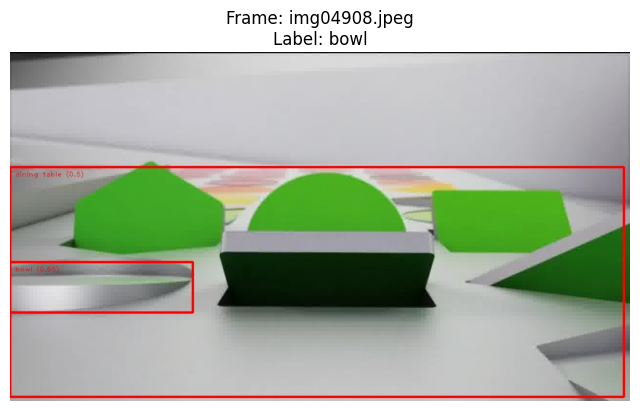

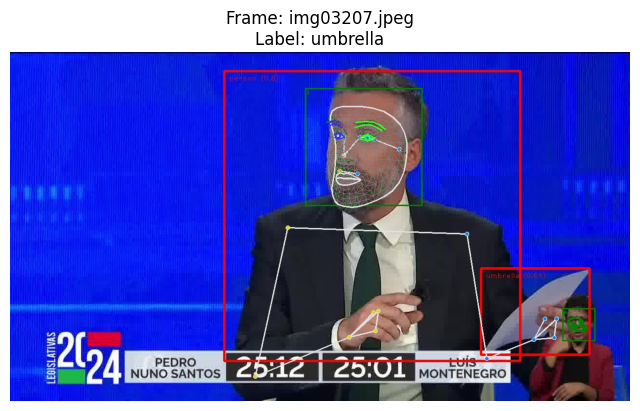

In [6]:
from collections import defaultdict

# Dictionary to store labels and their counts
label_counts = defaultdict(int)

# Iterate through each row of the DataFrame
for index, row in data.iterrows():
    frame_detections = row['detections']
    # Extract labels from detections and count occurrences
    for detection in frame_detections:
        label = detection[4]
        label_counts[label] += 1

# Print labels and their counts
for label, count in label_counts.items():
    print(f"Label: {label}, Number of Frames: {count}")

import matplotlib.pyplot as plt

# Extract labels and their counts
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Frequency of Labels')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Find the least frequent labels
least_frequent_labels = [label for label, count in label_counts.items() if count == min(label_counts.values())]

# Filter DataFrame for frames with least frequent labels
least_frequent_frames = []
for index, row in data.iterrows():
    frame_detections = row['detections']
    for detection in frame_detections:
        label = detection[4]
        if label in least_frequent_labels:
            least_frequent_frames.append((index, row['filename'], detection))

# Display examples of frames with least frequent labels
num_examples = min(5, len(least_frequent_frames))  # Display up to 5 examples
for i in range(num_examples):
    index, filename, detection = least_frequent_frames[i]
    frame_id = filename
    img = Image.open(os.path.join('processed',video, frame_id))
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Frame: {frame_id}\nLabel: {detection[4]}")
    plt.show()

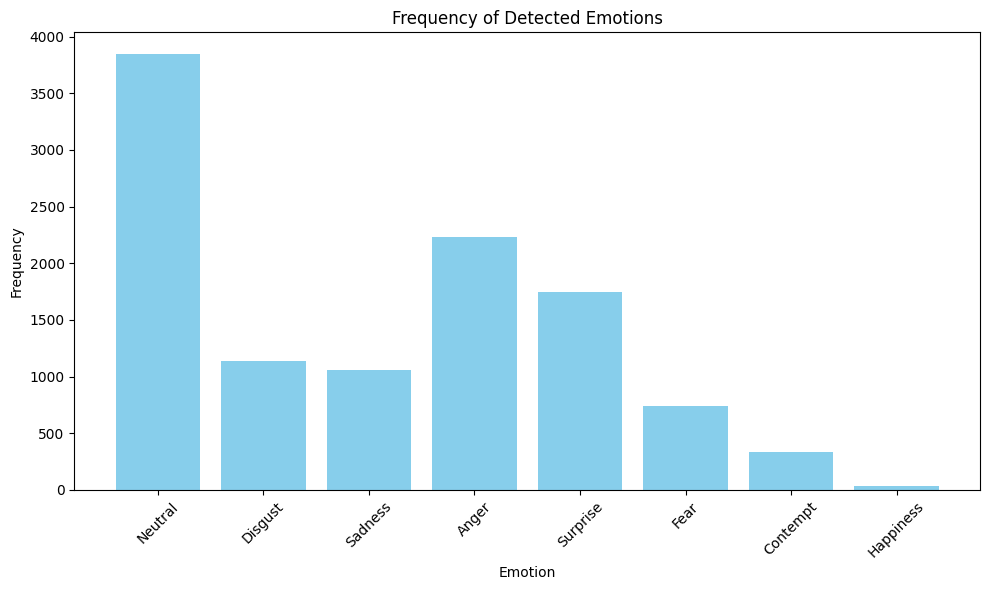

In [38]:
import matplotlib.pyplot as plt

# Extract all detected emotions
all_emotions = [entry['emotion'] for frame in data['fer'] for entry in frame]

# Count the occurrences of each emotion
emotion_counts = {}
for emotion in all_emotions:
    if emotion in emotion_counts:
        emotion_counts[emotion] += 1
    else:
        emotion_counts[emotion] = 1

# Plot the frequency of emotions in a histogram
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Frequency of Detected Emotions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()